In [77]:
#read the message csv file into the message_df dataframe
import pandas as pd
data_path = r'datasets/message.csv'
message_df = pd.read_csv(data_path)
print(message_df.shape)
message_df.head()

(5572, 2)


,Label,Message
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives aro...


As you can see above we have 5572 messages, with their related label(1(spam), 0(ham/non-spam))

# Data Preparation - Question1

**We are going to test all the functions in this notebook at the end based on K = 10 fold splitting (for each iteration) and test our results.

In [78]:
import numpy as np
# Q1.1 
#define num of unique words function
def num_unique_words(messages):
    unique_words = []
    for message in messages:
        for word in message.split():
            if word not in unique_words:
                unique_words.append(word)
    unique_words.sort()
    return unique_words

unique_words = num_unique_words(message_df['Message'])

#Q1.2
def count_of_unique(unique_words, message_series):
    #initialize count matrix using a numpy array
    count_matrix = np.zeros((message_series.shape[0],len(unique_words)))
    
    #get unique word counts for each message
    for ind, m in enumerate(message_series):
        words = m.split()
        for ui, w in enumerate(unique_words):
            count_matrix[ind,ui] = words.count(w)    

    return pd.DataFrame(count_matrix, columns=unique_words)    



In [79]:
# %%time
#Sample Function Call
count_unique_df = count_of_unique(unique_words, message_df['Message'])

We defined a function named num_unique_words that saves the unique_words into the unique_words array in alphabetical order when giving the training messages. Second, we defined the count_of_unique function that takes unique_words, and message series as parameters that, at first, create a NumPy array of M*N zeros, then counts the unique words in each message and populates the matrix accordingly, and we save the matrix into the count_unique_df dataframe. Finally, we get the running time to check if it's efficient, and in fact, for about 5000 rows and more than 8000 unique words, it is less than 15 seconds.

In [80]:
#checking the count_unique_df 
count_unique_df

,0,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,...,zogtorius,zoom,zouk,zyada,èn,é,ú1,ü,〨ud,鈥
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see above, there are around 5000 rows based on the length of our messages, and there are about 8000 unique words that are sorted alphabetically, starting from 0 as the first word.

In [81]:
#view the sum of each unique word for all messages, and get a feel of the data
count_unique_df.sum()

0                 4.0
00               10.0
000              29.0
000pes            1.0
008704050406      2.0
                ...  
é                 4.0
ú1                1.0
ü               173.0
〨ud               1.0
鈥                 1.0
Length: 8753, dtype: float64

# Spam Prediction Question 1 , Problem Refinement Question 1

In [82]:
#Train
#Question 1. compute P(y = 1), P(y = 0), P(xi|y = 0), and P(xi|y = 1)) where xi represents the i-th unique word:
def train(Y_train, count_unique_df, smoothing = False, alpha = 1):
    
    Y = pd.DataFrame()
    Y['Label'] = Y_train

    #calculate prior probabilities
    spam_prob =0
    not_spam_prob = 0

    #calculate the total number of spam and ham messages in the training labels
    spam_count = 0
    not_spam_count = 0
    total_count = Y.shape[0]
    for m in Y['Label']:
        if m == 1:
            spam_count += 1
        elif m == 0:
            not_spam_count += 1
    #P(y = 1):
    spam_prob = spam_count/total_count
    #P(y = 0):
    not_spam_prob = not_spam_count/total_count
    # checking if we calculated the probabilites correctly, so we sum the spam and not spam probabilities and they
    # become 1
    print('Sum of spam and not spam prior probabilities:', spam_prob+not_spam_prob)


    #Calculate the conditional probabilities for each unique word.
    spam_word_probs = {}
    not_spam_word_probs = {}

    #First Go Thorugh Spam Emails and get the count of each word in the dictionary
    spam_counts = count_unique_df[Y['Label'] == 1]
    for i in spam_counts:
        spam_word_probs[i] = spam_counts[i].sum()
    
    not_spam_counts = count_unique_df[Y['Label'] == 0]
    for i in not_spam_counts:
        not_spam_word_probs[i] = not_spam_counts[i].sum()

    #calculate the total spam and not_spam counts
    total_spam_words = sum(spam_word_probs.values())
    total_not_spam_words = sum(not_spam_word_probs.values())
    unique_words_count = len(unique_words)
    #As we can see the total spam probabilities and the total not spam probabilities round to 1
    
    #print(total_spam_words, total_not_spam_words, unique_words_count )

    #Without Smoothing
    if smoothing == False:
        #P(xi|y = 1):
        for i in spam_word_probs:
            spam_word_probs[i] = spam_word_probs[i]/total_spam_words
        #P(xi|y = 0):
        for i in not_spam_word_probs:
            not_spam_word_probs[i] = not_spam_word_probs[i]/total_not_spam_words
            
    #Problem Refinement
    #Laplace Smoothing - #alpha = 1
    #Question 1
    elif smoothing == True:
        #P(xi|y = 1):
        for i in spam_word_probs:
            spam_word_probs[i] = (spam_word_probs[i]+alpha)/(total_spam_words+ (alpha*unique_words_count))
        #P(xi|y = 0):
        for i in not_spam_word_probs:
            not_spam_word_probs[i] = (not_spam_word_probs[i]+alpha)/(total_not_spam_words+ (alpha*unique_words_count))

    print('Sum of all the conditional word probabilities for spam:',sum(spam_word_probs.values()))
    print('Sum of all the conditional word probabilities for not_spam:',sum(not_spam_word_probs.values()))
    
    return spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob

#Sample Function Call
spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob  = train(message_df['Label'] , count_unique_df)

Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999942
Sum of all the conditional word probabilities for not_spam: 0.9999999999999541


In the Train function, we answered Question 1 in spam prediction and Question 1 in Problem Refinement, which asked us to compute all the probabilities again with Laplace Smoothing. We check the sum of all the spam and not_spam as well as the conditional probabilities for all the unique words given that a message is spam or not_spam to make sure that they add up to 1 and that they are actual probabilities. We set arguments called smoothing and alpha to implement the training with Laplace Smoothing.

In [83]:
#spam_word_probs, not_spam_word_probs = train(message_df['Label'] , count_unique_df)

In [84]:
#spam_word_probs, not_spam_word_probs = train(message_df['Label'] , count_unique_df, True)

# Spam Prediction Question 1, Prediction Assesment Question 2

In [85]:
def pred(sample_message, spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob):
    sprob = 1
    nsprob = 1
    for w in sample_message.split():
        if w in spam_word_probs.keys():
            wsp = spam_word_probs[w] 
            wnsp = not_spam_word_probs[w]            
            sprob *= wsp
            nsprob *= wnsp
            
    sprob *= spam_prob
    nsprob *= not_spam_prob

    #Normalizing
    sprob = sprob/(nsprob+sprob)
    nsprob = nsprob/(nsprob+sprob)
    
    if sprob == 0 and nsprob ==0:
        raise Exception('Zero Probs')
        
    return sprob, nsprob

In [86]:
# for i in range(500):
#     print(pred(message_df['Message'][i], spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob))
pred(message_df['Message'][100], spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob)    

(0.0, 1.0)

In the above function, we calculated the conditional probability that a test message is spam or not.
Because the Naive Bayes theorem assumes that each word occurring in a message is independent of the other words' occurrence in the message, we multiply all the words' probabilities in each message. As we can see the sum of the spam and not_spam probabilities is always equal to 1. Therefore, from now on we only output the spam probability and and the not_spam probability can be simply computed by subtracting it from 1.

In [87]:
#Given the testing set, it generates a prediction array for each message in the testing set that contains the
#spam word probabilities
def test(X, spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob):
    preds = []
    for m in X:
        preds.append(pred(m, spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob)[0])
    return preds

#Sample Function Call
preds = test(message_df['Message'],spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob)
print(preds)

[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7611440586103485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.047730743120042, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4337143194344372e-07, 4.239323953884708e-05, 0.0, 0.0, 0.0, 0.0, 1.880504060320229e-08, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.00029269331034648534, 0.0, 0.0, 0.0, 1.0599336616561802e-06, 0.00011888451951374921, 0.0, 0.017872487703268432, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.3591975191980278e-05, 0.0, 0.0, 1.009015477081616e-05, 0.007445703825391543, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


# Prediction Assessment - Question1

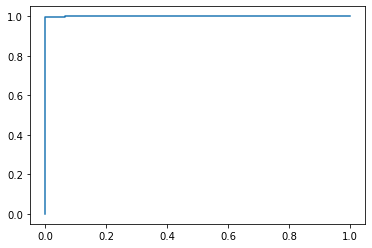

In [88]:
#Computes the true positive rates and the false positive rates at different thresholds as mentioned in the slides 
#to plot the ROC curve.
def my_roc_func(pred_probs, labels):
    df = pd.DataFrame({'predicted': pred_probs, 'label': labels})
    df = df.sort_values(by='predicted', ascending=False)
    df.reset_index(inplace=True, drop=True) 
    
    labels = df['label'].to_numpy()
    spams = df['label'].sum()
    hams = df.shape[0] - spams
    
    threshold = 0
    tpr = 0
    fpr = 0
    #The first dot on the ROC curve is (0, 0) because of TPR(0/T) and FPR(0/T) 
    roc_tpr = [0]
    roc_fpr = [0]
    predicted = []
    for row_index in range(df.shape[0]-1):
        current = df['label'][row_index]
        nxt = df['label'][row_index+1]
        if current != nxt:
            predicted = [1 for i in range(row_index+1)] + [0 for i in range(df.shape[0] - row_index-1)]
            tp = 0
            fp = 0
            for  a,b in zip(predicted, labels):
                if a==1 and b==1:
                    tp += 1
                elif a==1 and b==0:
                    fp += 1
            roc_tpr.append(tp/spams)
            roc_fpr.append(fp/hams)
    
    #Similarly the final point in the roc curve is (1,1) for tpr and fpr
    roc_tpr.append(1)
    roc_fpr.append(1)

    
    return roc_tpr, roc_fpr

#Sample Function Call
import matplotlib.pyplot as plt
tpr, fpr = my_roc_func(preds, message_df['Label'])
plt.plot(fpr,tpr)
plt.show()

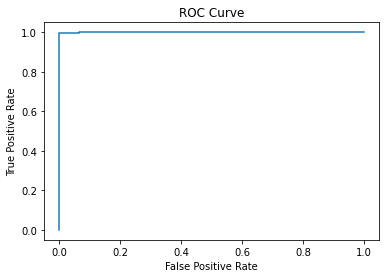

In [100]:
#Prediction Assessment
import matplotlib.pyplot as plt

#Plots the ROC Curve as well
def my_roc_func_v2(pred_probs, labels):
    df = pd.DataFrame({'predicted': pred_probs, 'label': labels})
    df = df.sort_values(by='predicted', ascending=False)
    df.reset_index(inplace=True, drop=True) 
    
    labels = df['label'].to_numpy()
    spams = df['label'].sum()
    hams = df.shape[0] - spams
    
    threshold = 0
    tpr = 0
    fpr = 0
    #The first dot on the ROC curve is (0, 0) because of TPR(0/T) and FPR(0/T) 
    roc_tpr = [0]
    roc_fpr = [0]
    predicted = []
    for row_index in range(df.shape[0]-1):
        current = df['label'][row_index]
        nxt = df['label'][row_index+1]
        if current != nxt:
            predicted = [1 for i in range(row_index+1)] + [0 for i in range(df.shape[0] - row_index-1)]
            tp = 0
            fp = 0
            for  a,b in zip(predicted, labels):
                if a==1 and b==1:
                    tp += 1
                elif a==1 and b==0:
                    fp += 1
            roc_tpr.append(tp/spams)
            roc_fpr.append(fp/hams)
    
    #Similarly the final point in the roc curve is (1,1) for tpr and fpr
    roc_tpr.append(1)
    roc_fpr.append(1)

    
#     return roc_tpr, roc_fpr
#     tpr, fpr = my_roc_func(preds, message_df['Label'])
    plt.plot(roc_fpr,roc_tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

my_roc_func_v2(preds, message_df['Label'])

# Prediction Assesment - Question3

In [89]:
def my_class_scores(preds, labels, thresh = 0.5):
#Calculate Confusion Matrix
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for p, t in zip(test_preds, y_test_folds):
        if p<thresh:
            p=0
        else: p = 1
        
        if p == 1:
            if t == 1:
                tp += 1
            elif t == 0:
                fp += 1
        elif p == 0:
            if t == 1:
                fn += 1
            elif t == 0:
                tn += 1
        else: raise Exception('Something wrong', p,t)
        
    correct = tp+tn
    total_predictions = tp+fp+tn+fn
    #print('TP FP TN FN')
    #print(tp, fp, tn, fn)

    #Create accuracy, precision, recall, and specificity based on their formula
    accuracy = correct/total_predictions
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(tn+fp)
    
    #create confusion_matrxi_dataframe based on lecture 7
    confusion_matrix = pd.DataFrame(columns = ["Actual: Positive", "Actual: Negative"])
    confusion_matrix["Actual: Positive"] = ['True Positives: ' + str(tp), 'False Negatives: '+str(fn)]
    confusion_matrix["Actual: Negative"] = ['False Positives: ' + str(fp), 'True Negatives: '+str(tn)]
    confusion_matrix.index = ["Predicted: Positive", "Predicted: Negative"]
#     confusion_matrix    
#     print('Accuracy:', correct, total_predictions)
#     print('Accuracy:', accuracy)
#     print('Precision:', precision)
#     print('Recall:', recall)
#     print('Specificity:', specificity)
#     print('Confusion Matrix:', confusion_matrix)
    return accuracy, precision, recall, specificity, confusion_matrix

#Sample Function Call
accuracy, precision, recall, specificity, confusion_matrix = my_class_scores(preds, message_df['Label'], thresh=0.5)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print()
print('Confusion Matrix:')
print(confusion_matrix)


Accuracy: 0.9892280071813285
Precision: 0.96
Recall: 0.96
Specificity: 0.9937759336099585

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 72   False Positives: 3
Predicted: Negative  False Negatives: 3  True Negatives: 479


## Without Laplace Smoothing

In this part, we are going to use the StratifiedKFolds for k=10 and have 10 iterations.
In each iteration, we will set aside part of our data for testing and the remaining parts for training the Naive Bayes algorithm. 
We will get the unique_words based on our training set; we will create an M*N Matrix for our training set, get the mean of each unique word in our training set, generate the ROC curves for our testing set, etc.
In fact, we will try all the above code for each iteration in each fold and test the result on our testing set, and create accuracy, precision, recall, and specificity based on their formula.

In [103]:
# %%time

from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sb

messages = message_df['Message'].copy()
labels = message_df['Label'].copy()
skfolds = StratifiedKFold(n_splits=10)

folds_avg_dic = {}
count = 1

#Indicates whether laplace smoothing is being applied or not. 
smoothing = False
#picking a threshold of 50% for computing the accuracy, precision and other evaluation metrics.
thresh = 0.5

tprs = []
fprs = []

accuracies = []
precisions = []
recalls = []
specificities = []
for train_index, test_index in skfolds.split(messages, labels):

    X_train_folds = messages[train_index].reset_index(drop=True)
    y_train_folds = labels[train_index].reset_index(drop=True)
    X_test_folds = messages[test_index].reset_index(drop=True)
    y_test_folds = labels[test_index].reset_index(drop=True)

    avg_dic = {}
    unique_words = num_unique_words(X_train_folds)
    count_unique_df = count_of_unique(unique_words, X_train_folds)
    #Data Preparation - Question 2
    folds_avg_dic[count] = count_unique_df.mean()
    print('Created Count Matrix for Fold',count)
    
    #train
    spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob = train(y_train_folds, count_unique_df, smoothing = smoothing)
    
    #test and generate roc curves 
    #Spam prediction 
    #Question 2
    test_preds = test(X_test_folds,spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob)
#     print('Spam Predictions for testing set ', test_preds)
    
    #The probability that the message is not spam is simply 1- spam_probability_of_the_message.
    
    #generate roc curve
    tpr, fpr = my_roc_func(test_preds, y_test_folds)
    tprs.append(tpr)
    fprs.append(fpr)

    accuracy, precision, recall, specificity, confusion_matrix = my_class_scores(test_preds, y_test_folds,thresh)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    specificities.append(specificity)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Specificity:', specificity)
    print()
    print('Confusion Matrix:')
    print(confusion_matrix)

    print('Fold',count,'Done')
    count += 1


Created Count Matrix for Fold 1
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999728
Sum of all the conditional word probabilities for not_spam: 1.0000000000000582
Accuracy: 0.953405017921147
Precision: 0.7474747474747475
Recall: 0.9866666666666667
Specificity: 0.94824016563147

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 74  False Positives: 25
Predicted: Negative  False Negatives: 1  True Negatives: 458
Fold 1 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 2
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999741
Sum of all the conditional word probabilities for not_spam: 0.9999999999999679
Accuracy: 0.9516129032258065
Precision: 0.7448979591836735
Recall: 0.9733333333333334
Specificity: 0.94824016563147

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 73  False Positives: 25
Predicted: Negative  False Negatives: 2  True Negatives: 458
Fold 2 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 3
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999818
Sum of all the conditional word probabilities for not_spam: 0.9999999999999641
Accuracy: 0.9551166965888689
Precision: 0.7752808988764045
Recall: 0.9324324324324325
Specificity: 0.9585921325051759

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 69  False Positives: 20
Predicted: Negative  False Negatives: 5  True Negatives: 463
Fold 3 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 4
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.999999999999998
Sum of all the conditional word probabilities for not_spam: 0.9999999999999583
Accuracy: 0.9730700179533214
Precision: 0.8390804597701149
Recall: 0.9864864864864865
Specificity: 0.9710144927536232

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 73  False Positives: 14
Predicted: Negative  False Negatives: 1  True Negatives: 469
Fold 4 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 5
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.000000000000021
Sum of all the conditional word probabilities for not_spam: 1.0000000000000788
Accuracy: 0.9461400359066428
Precision: 0.7391304347826086
Recall: 0.918918918918919
Specificity: 0.9503105590062112

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 68  False Positives: 24
Predicted: Negative  False Negatives: 6  True Negatives: 459
Fold 5 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 6
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.0000000000000242
Sum of all the conditional word probabilities for not_spam: 1.0000000000000593
Accuracy: 0.9425493716337523
Precision: 0.7216494845360825
Recall: 0.9333333333333333
Specificity: 0.9439834024896265

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 70  False Positives: 27
Predicted: Negative  False Negatives: 5  True Negatives: 455
Fold 6 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 7
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999759
Sum of all the conditional word probabilities for not_spam: 0.9999999999999526
Accuracy: 0.9640933572710951
Precision: 0.8089887640449438
Recall: 0.96
Specificity: 0.9647302904564315

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 72  False Positives: 17
Predicted: Negative  False Negatives: 3  True Negatives: 465
Fold 7 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 8
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999893
Sum of all the conditional word probabilities for not_spam: 0.9999999999999356
Accuracy: 0.9497307001795332
Precision: 0.7473684210526316
Recall: 0.9466666666666667
Specificity: 0.950207468879668

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 71  False Positives: 24
Predicted: Negative  False Negatives: 4  True Negatives: 458
Fold 8 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 9
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.0000000000000226
Sum of all the conditional word probabilities for not_spam: 1.0000000000000475
Accuracy: 0.940754039497307
Precision: 0.71
Recall: 0.9466666666666667
Specificity: 0.9398340248962656

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 71  False Positives: 29
Predicted: Negative  False Negatives: 4  True Negatives: 453
Fold 9 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 10
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999849
Sum of all the conditional word probabilities for not_spam: 1.0000000000000497
Accuracy: 0.9658886894075404
Precision: 0.8181818181818182
Recall: 0.96
Specificity: 0.966804979253112

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 72  False Positives: 16
Predicted: Negative  False Negatives: 3  True Negatives: 466
Fold 10 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


In [104]:
#The Plot for the average count of each unique word is created in the last cell.
print("Average Count of Each Unique words across all messages", folds_avg_dic)

Average Count of Each Unique words across all messages {1: 0               0.000798
00              0.001994
000             0.005185
000pes          0.000199
008704050406    0.000399
                  ...   
èn              0.000199
é               0.000798
ü               0.032708
〨ud             0.000199
鈥               0.000199
Length: 8345, dtype: float64, 2: 0               0.000798
00              0.001197
000             0.004388
000pes          0.000199
008704050406    0.000399
                  ...   
é               0.000798
ú1              0.000199
ü               0.030913
〨ud             0.000199
鈥               0.000199
Length: 8245, dtype: float64, 3: 0               0.000798
00              0.001994
000             0.005184
000pes          0.000199
008704050406    0.000399
                  ...   
é               0.000798
ú1              0.000199
ü               0.030907
〨ud             0.000199
鈥               0.000199
Length: 8291, dtype: float64, 4: 0               0

Above we show the evaluation metrics and the confusion matrix for each fold.

In [105]:
print("Average Metrics Along All The Folds:")
print('Average Accuracy:', sum(accuracies)/len(accuracies))
print('Average Precision:', sum(precisions)/len(precisions))
print('Average Recall:', sum(recalls)/len(recalls))
print('Average Specificity:', sum(specificities)/len(specificities))

Average Metrics Along All The Folds:
Average Accuracy: 0.9542360829585015
Average Precision: 0.7652052987903025
Average Recall: 0.9544504504504505
Average Specificity: 0.9541957681503055


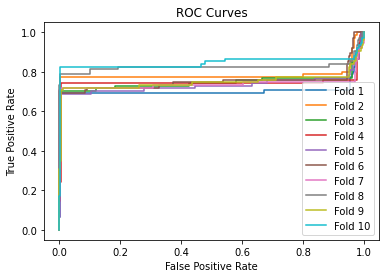

In [93]:
print()
# print('ROC Curves:')
for fpr, trp in zip(fprs, tprs):
    plt.plot(fpr,trp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(['Fold '+str(i) for i in range(1,11)], loc=4)
plt.show()    

## With Laplace Smoothing

In [94]:
# %%time
#Problem Refinement
#Question 1
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sb

messages = message_df['Message'].copy()
labels = message_df['Label'].copy()
skfolds = StratifiedKFold(n_splits=10)

folds_avg_dic = {}
count = 1

#Indicates whether laplace smoothing is being applied or not. 
smoothing = True
#picking a threshold of 50% for computing the accuracy, precision and other evaluation metrics.
thresh = 0.5

tprs = []
fprs = []

accuracies = []
precisions = []
recalls = []
specificities = []
for train_index, test_index in skfolds.split(messages, labels):

    X_train_folds = messages[train_index].reset_index(drop=True)
    y_train_folds = labels[train_index].reset_index(drop=True)
    X_test_folds = messages[test_index].reset_index(drop=True)
    y_test_folds = labels[test_index].reset_index(drop=True)

    avg_dic = {}
    unique_words = num_unique_words(X_train_folds)
    count_unique_df = count_of_unique(unique_words, X_train_folds)
    #Data Preparation - Question 2
    folds_avg_dic[count] = count_unique_df.mean()
    print('Created Count Matrix for Fold',count)
    
    #train
    spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob = train(y_train_folds, count_unique_df, smoothing = smoothing)
    
    #test and generate roc curves 
    #Spam prediction 
    #Question 2
    test_preds = test(X_test_folds,spam_word_probs, not_spam_word_probs, spam_prob, not_spam_prob)
#     print('Spam Predictions for testing set ', test_preds)
    
    #The probability that the message is not spam is simply 1- spam_probability_of_the_message.
    
    #generate roc curve
    tpr, fpr = my_roc_func(test_preds, y_test_folds)
    tprs.append(tpr)
    fprs.append(fpr)

    accuracy, precision, recall, specificity, confusion_matrix = my_class_scores(test_preds, y_test_folds,thresh)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    specificities.append(specificity)

    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('Specificity:', specificity)
    print()
    print('Confusion Matrix:')
    print(confusion_matrix)

    print('Fold',count,'Done')
    count += 1


Created Count Matrix for Fold 1
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.999999999999958
Sum of all the conditional word probabilities for not_spam: 0.9999999999999598
Accuracy: 0.9910394265232975
Precision: 0.9605263157894737
Recall: 0.9733333333333334
Specificity: 0.9937888198757764

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 73   False Positives: 3
Predicted: Negative  False Negatives: 2  True Negatives: 480
Fold 1 Done
Created Count Matrix for Fold 2
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.999999999999916
Sum of all the conditional word probabilities for not_spam: 1.0000000000000482
Accuracy: 0.982078853046595
Precision: 0.9452054794520548
Recall: 0.92
Specificity: 0.9917184265010351

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Posi

<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 3
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999037
Sum of all the conditional word probabilities for not_spam: 0.9999999999999559
Accuracy: 0.9838420107719928
Precision: 0.9577464788732394
Recall: 0.918918918918919
Specificity: 0.9937888198757764

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 68   False Positives: 3
Predicted: Negative  False Negatives: 6  True Negatives: 480
Fold 3 Done
Created Count Matrix for Fold 4
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.0000000000001452
Sum of all the conditional word probabilities for not_spam: 1.0000000000000044
Accuracy: 0.9874326750448833
Precision: 0.9466666666666667
Recall: 0.9594594594594594
Specificity: 0.9917184265010351

Confusion Matrix:
                       Actual: Positive     Actual: Negative

<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 5
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999721
Sum of all the conditional word probabilities for not_spam: 1.000000000000004
Accuracy: 0.9802513464991023
Precision: 0.9701492537313433
Recall: 0.8783783783783784
Specificity: 0.9958592132505176

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 65   False Positives: 2
Predicted: Negative  False Negatives: 9  True Negatives: 481
Fold 5 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 6
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.000000000000158
Sum of all the conditional word probabilities for not_spam: 0.9999999999999284
Accuracy: 0.9838420107719928
Precision: 0.9852941176470589
Recall: 0.8933333333333333
Specificity: 0.9979253112033195

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 67   False Positives: 1
Predicted: Negative  False Negatives: 8  True Negatives: 481
Fold 6 Done


<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Created Count Matrix for Fold 7
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 0.9999999999999046
Sum of all the conditional word probabilities for not_spam: 1.0000000000000218
Accuracy: 0.9820466786355476
Precision: 0.9452054794520548
Recall: 0.92
Specificity: 0.991701244813278

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True Positives: 69   False Positives: 4
Predicted: Negative  False Negatives: 6  True Negatives: 478
Fold 7 Done
Created Count Matrix for Fold 8
Sum of spam and not spam prior probabilities: 1.0
Sum of all the conditional word probabilities for spam: 1.0000000000000078
Sum of all the conditional word probabilities for not_spam: 0.9999999999999736
Accuracy: 0.9874326750448833
Precision: 0.9857142857142858
Recall: 0.92
Specificity: 0.9979253112033195

Confusion Matrix:
                       Actual: Positive     Actual: Negative
Predicted: Positive  True P

<ipython-input-85-5f26d847b0c4>:19: RuntimeWarning: invalid value encountered in double_scalars
  sprob = sprob/(nsprob+sprob)


Above we show the evaluation metrics and the confusion matrix for each fold.

In [95]:
print("Average Count of Each Unique words across all messages", folds_avg_dic)
#The Plot for the average count of each unique word is created in the last cell.

Average Count of Each Unique words across all messages {1: 0               0.000798
00              0.001994
000             0.005185
000pes          0.000199
008704050406    0.000399
                  ...   
èn              0.000199
é               0.000798
ü               0.032708
〨ud             0.000199
鈥               0.000199
Length: 8345, dtype: float64, 2: 0               0.000798
00              0.001197
000             0.004388
000pes          0.000199
008704050406    0.000399
                  ...   
é               0.000798
ú1              0.000199
ü               0.030913
〨ud             0.000199
鈥               0.000199
Length: 8245, dtype: float64, 3: 0               0.000798
00              0.001994
000             0.005184
000pes          0.000199
008704050406    0.000399
                  ...   
é               0.000798
ú1              0.000199
ü               0.030907
〨ud             0.000199
鈥               0.000199
Length: 8291, dtype: float64, 4: 0               0

In [102]:
print("Average Metrics Along All The Folds:")
print('Average Accuracy:', sum(accuracies)/len(accuracies))
print('Average Precision:', sum(precisions)/len(precisions))
print('Average Recall:', sum(recalls)/len(recalls))
print('Average Specificity:', sum(specificities)/len(specificities))

Average Metrics Along All The Folds:
Average Accuracy: 0.9851035694291616
Average Precision: 0.9602454023272123
Average Recall: 0.9276756756756758
Average Specificity: 0.9939902751647294


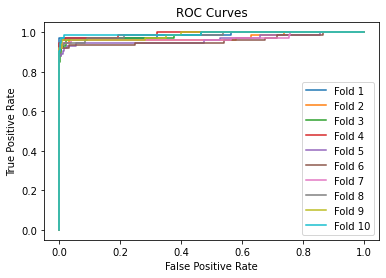

In [97]:
print()
# print('ROC Curves:')
for fpr, trp in zip(fprs, tprs):
    plt.plot(fpr,trp)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

plt.legend(['Fold '+str(i) for i in range(1,11)], loc=4)

plt.show()    

In [98]:
# plt.xticks(fontsize=14, rotation=90)

# Data Preparation - Question 2
Plotting Word Frequencies for each fold

Fold 1


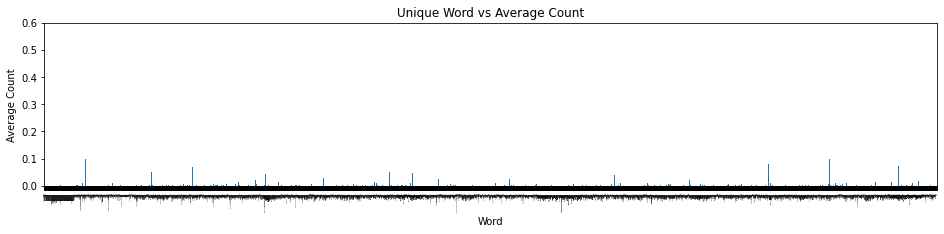


Fold 2


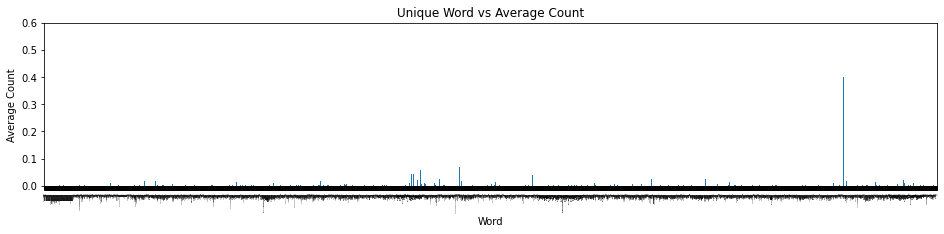


Fold 3


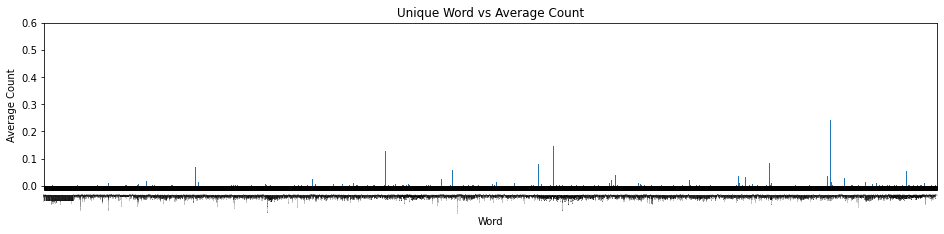


Fold 4


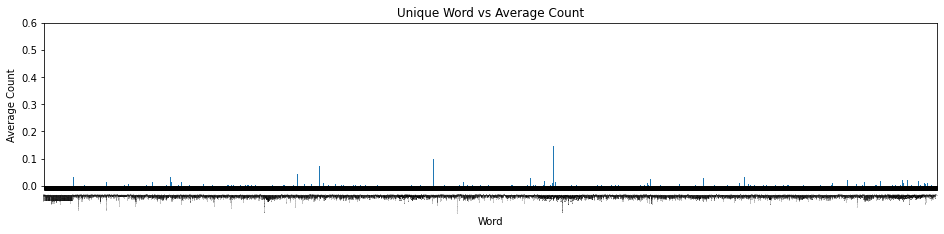


Fold 5


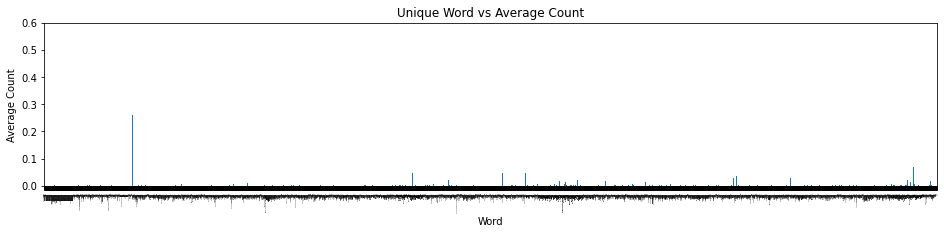


Fold 6


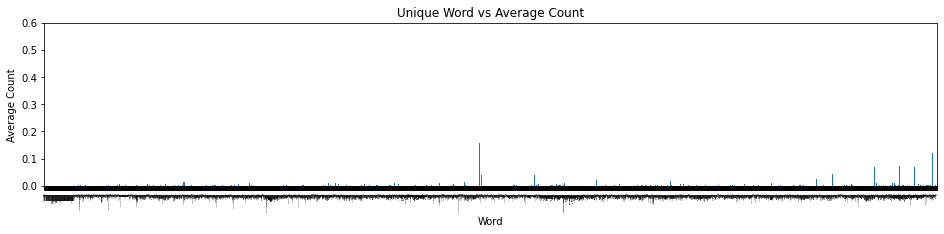


Fold 7


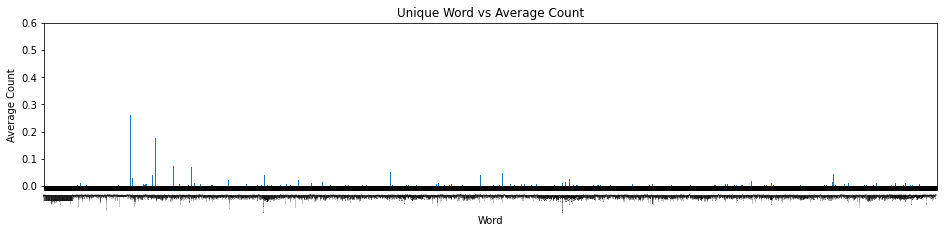


Fold 8


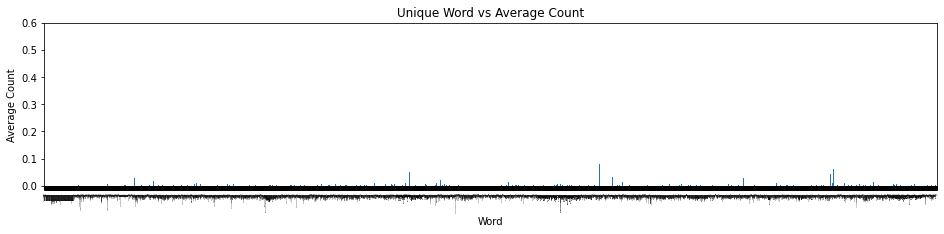


Fold 9


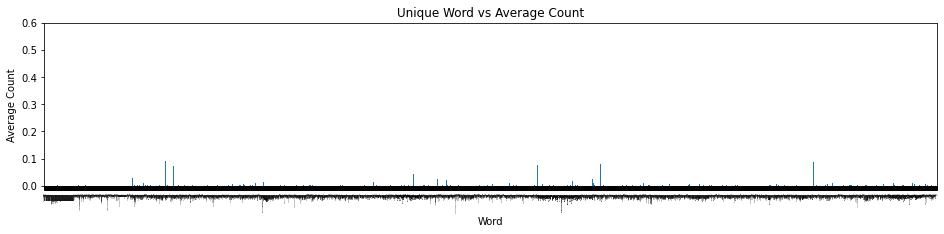


Fold 10


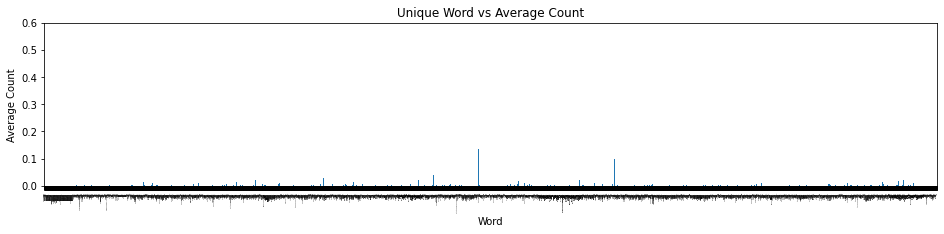

In [76]:
import matplotlib.pyplot as plt

count = 1

for key in folds_avg_dic:
    print('Fold', count)
    series = folds_avg_dic[key]
    sd = series.to_dict()
    words = list(sd.keys())
    averages = list(sd.values())
    plt.figure(figsize=(16, 3))
    x1,x2,y1,y2 = plt.axis()  
    plt.axis((x1,x2,0,0.6))
    plt.bar(range(len(sd)), averages, tick_label=words)
    plt.xlabel('Word')
    plt.ylabel('Average Count')
    plt.title('Unique Word vs Average Count')
    plt.xticks(fontsize=1, rotation=90)
    plt.show()
    count    += 1
    print()


In [ ]:
#Alternate code, takes lesser time but smaller plots.
# import matplotlib.pyplot as plt

# for key in folds_avg_dic:
#     plt.figure(figsize=(16, 3))
#     series = folds_avg_dic[key]
#     sd = series.to_dict()
    
#     words = list(sd.keys())
#     averages = list(sd.values())
#     plt.bar(range(len(sd)), averages, tick_label=words)
#     plt.xlabel('Word')
#     plt.ylabel('Average Count')
#     plt.title('Unique Word vs Average Count')
#     plt.show()

# Prediction Assessment - Question 4

Although Naive Bayes is a simple algorithm and makes Naive assumptions about the data, it performs well. 
However, it presents some challenges. First of all, it is called Naive because it has this naive assumption that the probability of each word occurring in a sentence is independent of other words' occurrence, but since words maybe correlate, the naive assumption might fail and negatively affect performance.
Second, it presents some challenges in handling zero probability cases; we cannot predict messages effectively if the words are not in our train vocabulary.
For improvement, we can clean the data further. For example, we can remove the words that rarely occur because, in this case, we might incorrectly categorize a message being as spam/ham based on one occurrence. Also, we could identify these rare words and gather more emails containing those words so that our model could predict with better confidence. Moreover, we could maybe perform stratified splitting based on the word counts and see if it improves our performance even further.
Most importantly, we can see that the ROC curves quickly reach a high tpr meaning that the model can make accurate predictions with high confidence/probability.

# Problem Refinement - Question 2 (Result of Laplace Smoothing)
Discuss how the results after Laplace Smoothing differ from the prior results.

We ran all our code once without Laplace smoothing and once with Laplace smoothing and printed average accuracy, average precision, average recall, and average specificity.
Although we got high and very confident values of 95%, 75%, 98%, and 94% for each of them accordingly, after applying the Laplace smoothing, we got even higher values of 99%, 96%, 97%, and 99% percent accordingly. As we can notice, the precision value changed from 75% to 96%, which is a significant improvement. Moreover, it helps us handle zero probability cases when a word does not occur in one of spam or not spam messages.


# References

The following articles and links were referred to for understanding a few concepts to answer question 1:

- https://towardsdatascience.com/laplace-smoothing-in-na%C3%AFve-bayes-algorithm-9c237a8bdece:
To understand Laplace Smoothing. 

- https://www.kdnuggets.com/2020/07/spam-filter-python-naive-bayes-scratch.html
For understanding the theory behind naive bayes and clarifying doubts such as "should we count multiple occurences of a word in a message".

- https://pandas.pydata.org/docs/

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html